## Hands-On K-Means Clustering

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

#### Importing The Iris Dataset

In [2]:
iris = pd.read_csv('IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


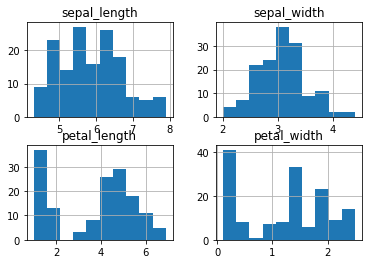

In [3]:
iris.hist()
plt.show()

### Selecting The Features For Clustering

#### Dropping the 'Species' column

In [4]:
iris_clustering = iris.drop(columns = 'species')

#### Selecting 2 random features from the dataset for clustering

In [5]:
X = iris_clustering.iloc[:, [0,2]].values

In [6]:
X[:3]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3]])

In [7]:
X = pd.DataFrame(X, columns=['sepal_length','petal_length'])
X

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


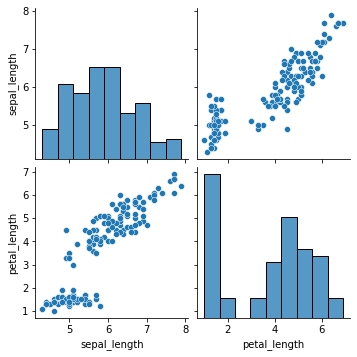

In [8]:
sns.pairplot(X)

#### choose 3 cluster

In [9]:
model = KMeans(n_clusters=3)
model

KMeans(n_clusters=3)

#### training: only X(input) is used

In [10]:
model.fit(X)

KMeans(n_clusters=3)

In [11]:
X[:3]

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3


#### output clusters

In [12]:
model.labels_ 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [13]:
model.predict([[5.1,1.4]])

C:\Users\chava\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

#### 3 centroids = 3 Clusters

In [14]:
model.cluster_centers_[:,0]

array([6.83902439, 5.00784314, 5.87413793])

In [15]:
model.cluster_centers_[:,1]

array([5.67804878, 1.49411765, 4.39310345])

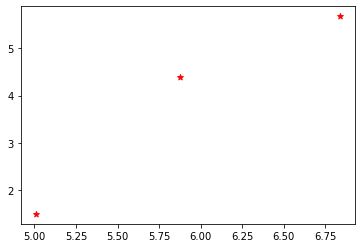

In [16]:
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='r',marker='*')

#### Testing phase

In [17]:
y = model.fit_predict(X)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [18]:
X[:2]

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4


In [19]:
X['cluster'] = y
X

,sepal_length,petal_length,cluster
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,0
147,6.5,5.2,2
148,6.2,5.4,2


In [20]:
X.shape

(150, 3)

#### Visualising The Clusters

In [21]:
df1 = X[X['cluster']==0]
df2 = X[X['cluster']==1]
df3 = X[X['cluster']==2]

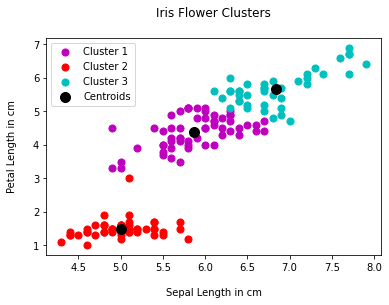

In [22]:
plt.scatter(df1['sepal_length'],df1['petal_length'], s = 50, c = 'm', label = 'Cluster 1')
plt.scatter(df2['sepal_length'],df2['petal_length'], s = 50, c = 'r', label = 'Cluster 2')
plt.scatter(df3['sepal_length'],df3['petal_length'], s = 50, c = 'c', label = 'Cluster 3')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'k', label = 'Centroids')

plt.title('Iris Flower Clusters\n')
plt.xlabel('\nSepal Length in cm')
plt.ylabel('Petal Length in cm\n')
plt.legend()
plt.show()

#### Using Elbow Graph To Find Optimum Number Of Clusters

In [23]:
wcss = []
for i in range(1, 11):
   km = KMeans(n_clusters = i, random_state = 42)
   km.fit(X)
   # appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
   wcss.append(km.inertia_)

C:\Users\chava\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
wcss

[663.1054,
 209.7427193153083,
 53.801351193126536,
 40.19870487804879,
 26.774089655172414,
 22.976209135691892,
 19.289971913236933,
 16.817348746081507,
 14.55187337662338,
 12.852090760546643]

#### Plotting The Elbow graph

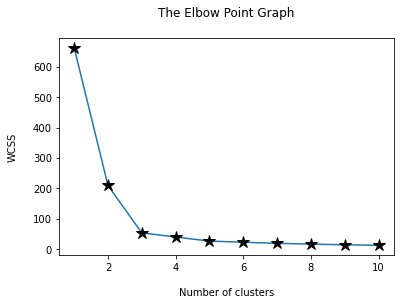

In [25]:
plt.plot(range(1, 11), wcss)
plt.plot(range(1,11),wcss, linestyle=' ', marker='*', color='k', markersize=12)
plt.title('The Elbow Point Graph\n')
plt.xlabel('\nNumber of clusters')
plt.ylabel('WCSS\n')
plt.show()

#### silhouette_score

In [26]:
from sklearn.metrics import silhouette_score

In [27]:
X[:3]

,sepal_length,petal_length,cluster
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1


In [28]:
new = KMeans(n_clusters=3)
new

KMeans(n_clusters=3)

In [29]:
new.fit(X)

KMeans(n_clusters=3)

In [30]:
new.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [31]:
silhouette_score(X,new.labels_)

0.7333254929306681

In [32]:
score = []
for i in range(2,6):
    new = KMeans(n_clusters=i)
    new.fit(X)
    print((silhouette_score(X,new.labels_)))

0.6375276269185218
0.7333254929306681
0.6385756561701385
0.6179529755559033
